# Ejercicio 4: Algoritmos ML


Las líneas 400 y 500, realizan un proceso de corte de un papel filtrante por ultrasonidos para su posterior incorporación a las líneas 4 y 5 donde se suelda para terminar de ensamblar los filtros.

1.	LOCATION_ID: Identificador único para la localización dentro de las distintas plantas de producción.
2.	Line: Línea de producción (para un mismo producto puede disponerse de varias líneas para aumentar el volumen de producción).
3.	Station: Estación física de trabajo diseñada para realizar uno o varios procesos productivos (una estación puede contar con varios puestos de trabajo). La etiqueta indica un tipo de estación no una unidad física.
4.	Index: Indica el número de estaciones del mismo tipo que hay dentro de la línea. Ej. Línea: 400, Station:20, Index:1,2 (si hay dos estaciones de tipo 20 dentro de la línea 400).
5.	Fu: Function Unit. Separaciones funcionales dentro de la estación e index. Cuando dentro de una estación se realizan dos funciones distintas.
6.	WP: Work Position. Posición donde se pueden realizar uno o más procesos, dentro de una function unit (ej. envasar y estampar).
7.	TP: Tool Position. Posición de la herramienta dentro del WP. Varia cuando tienes varias herramientas involucradas en la misma WP.
8.	RESULT_DATE: Fecha, hora y franja horaria.
9.	UNIQUEPART_ID: **Identificador único** de cada una de las piezas producidas.
10.	Cut Amplitude: Amplitud del corte realizado (micrómetros).
11.	Cut Energy: Energía utilizada en el corte (J).
12.	Cut Frecuency: Frecuencia ultrasonido utilizada para realizar el corte (Hz).
13.	Cut Power: Potencia de corte (W).
14.	Cut WeldTime: Tiempo necesario para realizar el corte del papel (ms).
15.	Grammage: Gramaje del papel de lija (g/m2).
16.	Humidity: Humedad del entorno (%).
17.	Temperature: Grados del entorno.
















Importar librerias con las que trabajaremos

In [841]:

from scipy import stats
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm


Cargar fichero con los datos a utilizar

In [842]:
# Load dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')

Analisis de los datos

In [843]:
# See first 5 rows of dataset
df.head()

,LOCATION_ID,Line,Station,Index,Fu,WP,TP,RESULT_DATE,UNIQUEPART_ID,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
0,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:30,925766000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070131,122.0,320.0,20081.0,3522.0,383.0,0.0,35.56017,23.40465
1,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:35,066370000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070135,102.0,320.0,20078.0,2730.0,283.0,0.0,35.52355,23.44279
2,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:41,316380000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070141,123.0,320.0,20106.0,3315.0,274.0,0.0,35.52660,23.41533
3,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:47,582042000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070147,107.0,320.0,20080.0,2844.0,280.0,0.0,35.48082,23.39702
4,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:53,865001000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070154,101.0,320.0,20078.0,2763.0,285.0,0.0,35.46556,23.41228


In [844]:
# See basic stats for numerical columns
df.describe()

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,16076.000000,16076.0,16076.0,16076.000000,16076.0,16076.0,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000
mean,475.161732,20.0,1.0,3.170814,21.0,1.0,111.260761,332.841192,20032.532657,2506.980592,329.596479,407.585581,35.040988,22.461128
std,43.208835,0.0,0.0,0.985334,0.0,0.0,9.251505,22.414825,43.351907,1051.830733,49.945660,210.529409,1.338493,0.288926
min,400.000000,20.0,1.0,2.000000,21.0,1.0,81.000000,280.000000,19972.000000,13.000000,201.000000,0.000000,30.030210,21.810050
25%,500.000000,20.0,1.0,2.000000,21.0,1.0,104.000000,320.000000,20000.000000,1698.000000,286.000000,491.710400,34.290600,22.263250
50%,500.000000,20.0,1.0,4.000000,21.0,1.0,111.000000,330.000000,20020.000000,2634.000000,345.000000,510.643400,34.708700,22.446360
75%,500.000000,20.0,1.0,4.000000,21.0,1.0,119.000000,350.000000,20058.000000,3358.000000,364.000000,520.948300,35.352640,22.609640
max,500.000000,20.0,1.0,4.000000,21.0,1.0,131.000000,390.000000,20190.000000,4466.000000,499.000000,666.406500,40.534680,23.500780


In [845]:
# Plot correlation between numerical columns
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
df[numCols].corr()

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
Cut Amplitude,1.000000,-0.088484,0.411653,0.899703,0.158348,-0.139214,0.119788,0.133060
Cut Energy,-0.088484,1.000000,-0.051025,-0.216703,0.708144,0.355684,-0.125524,0.101788
Cut Frequency,0.411653,-0.051025,1.000000,0.412032,0.104043,-0.539887,0.476386,0.347690
Cut Power,0.899703,-0.216703,0.412032,1.000000,0.076624,-0.043887,0.062471,0.089603
Cut WeldTime,0.158348,0.708144,0.104043,0.076624,1.000000,0.063371,0.046564,0.114621
Grammage,-0.139214,0.355684,-0.539887,-0.043887,0.063371,1.000000,-0.622789,-0.225381
Humidity,0.119788,-0.125524,0.476386,0.062471,0.046564,-0.622789,1.000000,0.013942
Temperature,0.133060,0.101788,0.347690,0.089603,0.114621,-0.225381,0.013942,1.000000


<Axes: xlabel='Cut Amplitude', ylabel='Cut Power'>

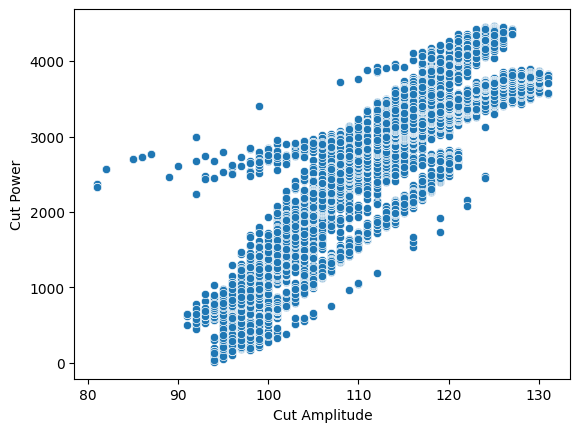

In [846]:
sns.scatterplot(data=df, x='Cut Amplitude', y='Cut Power')

<Axes: xlabel='Grammage', ylabel='Cut Power'>

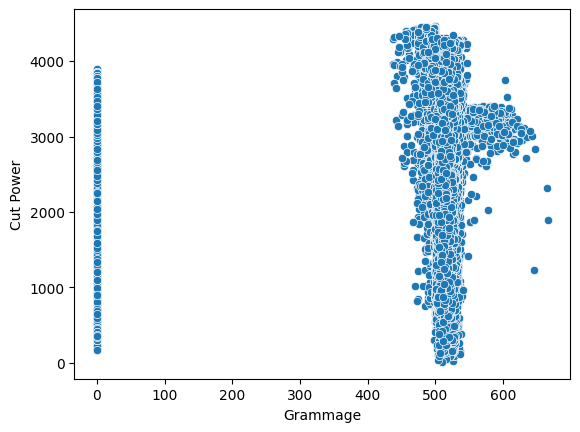

In [847]:
sns.scatterplot(data=df, x='Grammage', y='Cut Power')

<Axes: xlabel='Cut Energy', ylabel='Cut WeldTime'>

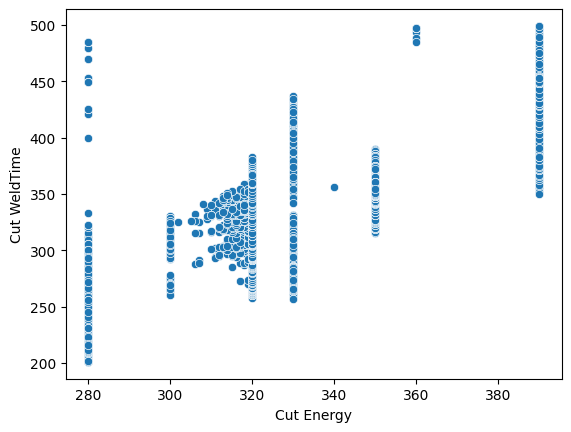

In [848]:
sns.scatterplot(data=df, x='Cut Energy', y='Cut WeldTime')

In [849]:
df = df.loc[df['Grammage'] != 0]

### CLASIFICACION

In [850]:
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
x = df[numCols]
y=df['Line']

In [851]:
scaler = preprocessing.MinMaxScaler().fit(x)
X_scaled = scaler.transform(x)
X_scaled

array([[0.39583333, 1.        , 0.81192661, ..., 0.67274899, 0.54938519,
        0.97635619],
       [0.54166667, 1.        , 0.85321101, ..., 0.58151285, 0.55190915,
        0.97930683],
       [0.8125    , 1.        , 0.98165138, ..., 0.50386276, 0.55159378,
        1.        ],
       ...,
       [0.77083333, 0.45454545, 0.30733945, ..., 0.39038365, 0.34806004,
        0.39901344],
       [0.875     , 0.45454545, 0.39908257, ..., 0.39011716, 0.35121576,
        0.40985395],
       [0.66666667, 0.45454545, 0.27981651, ..., 0.38026105, 0.35500221,
        0.39901344]])

In [852]:
y

3370     400
3371     400
3372     400
3373     400
3374     400
        ... 
16071    500
16072    500
16073    500
16074    500
16075    500
Name: Line, Length: 12706, dtype: int64

In [853]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7,shuffle=True)

In [854]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [855]:
y_pred = clf.predict(x_test)
y_pred 

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)

In [856]:
y_test

15527    500
8979     500
6258     500
13399    500
12458    500
        ... 
3370     400
10431    500
9470     500
7235     500
4527     500
Name: Line, Length: 3177, dtype: int64

<Axes: >

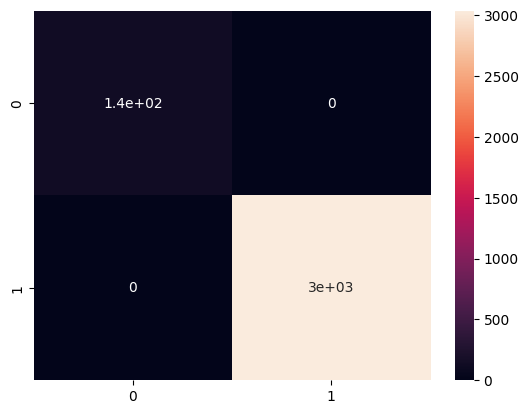

In [857]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [858]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

1.0

In [859]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,pos_label=400)

1.0

### REGRESION

<Axes: ylabel='Grammage'>

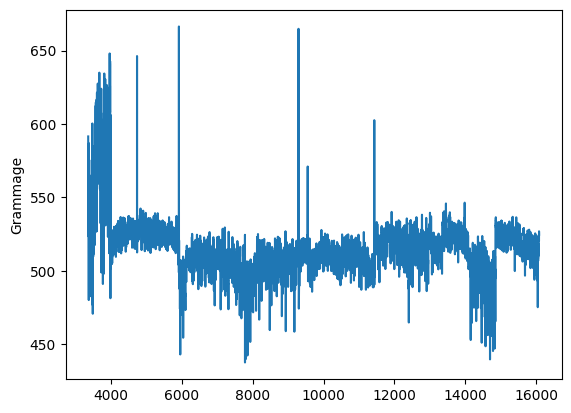

In [860]:
sns.lineplot(data=df['Grammage'])

<Axes: ylabel='Grammage'>

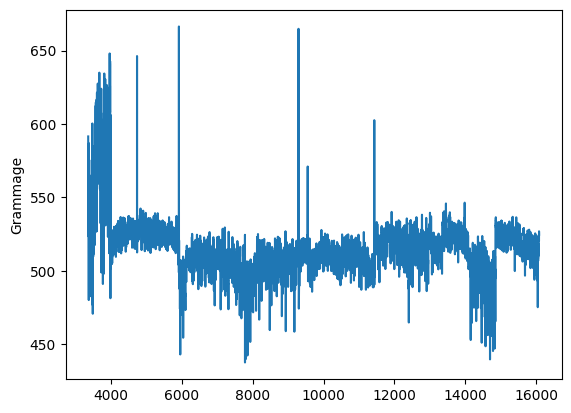

In [861]:
dfGrammage = df.loc[df['Grammage'] != 0]
sns.lineplot(data=dfGrammage['Grammage'])

In [862]:
c = ['Line','Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Humidity','Temperature','Grammage']
dfClean = dfGrammage[c]
scaler = preprocessing.MinMaxScaler().fit(dfClean)
df_scaled = scaler.transform(dfClean)
df_scaled

array([[0.        , 0.39583333, 1.        , ..., 0.54938519, 0.97635619,
        0.67274899],
       [0.        , 0.54166667, 1.        , ..., 0.55190915, 0.97930683,
        0.58151285],
       [0.        , 0.8125    , 1.        , ..., 0.55159378, 1.        ,
        0.50386276],
       ...,
       [1.        , 0.77083333, 0.45454545, ..., 0.34806004, 0.39901344,
        0.39038365],
       [1.        , 0.875     , 0.45454545, ..., 0.35121576, 0.40985395,
        0.39011716],
       [1.        , 0.66666667, 0.45454545, ..., 0.35500221, 0.39901344,
        0.38026105]])

In [863]:
#numCols = ['Line','Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Humidity','Temperature']
x = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [864]:
y

array([0.67274899, 0.58151285, 0.50386276, ..., 0.39038365, 0.39011716,
       0.38026105])

In [865]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [866]:
regr = svm.SVR()
regr.fit(x_train, y_train)

SVR()

In [867]:
y_pred = regr.predict(x_test)
y_pred 

array([0.36387736, 0.38462586, 0.34633295, ..., 0.35512577, 0.36004404,
       0.37054316])

In [868]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5369666771141686

In [869]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.04107761675909496

In [870]:
mean_squared_error(y_test, y_pred)

0.0026843818850970855

In [871]:
my_pd=pd.DataFrame(data=[y_test,y_pred]).T
my_pd.columns=['y','y_pred']
my_pd = my_pd.sort_values(by=['y_pred'])
my_pd= my_pd.reset_index(drop=True)
my_pd

,y,y_pred
0,0.258524,0.163016
1,0.201518,0.163704
2,0.232419,0.164224
3,0.259856,0.164898
4,0.258524,0.165062
...,...,...
3172,0.862547,0.679351
3173,0.753197,0.745439
3174,0.633325,0.747129
3175,0.713106,0.772472


<Axes: ylabel='y_pred'>

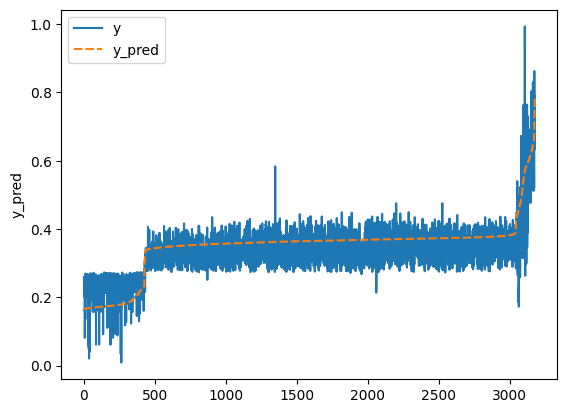

In [872]:
sns.lineplot(data=my_pd['y_pred'])
sns.lineplot(data=my_pd)


# Contenido mínimo : 


1. Utiliza uno o dos metodos de seleccion de variables para evaluarlas y descartar alguna variable en caso de considerarse conveniente.  
1. Utiliza otro metodo de clasificación para identificar a que linea pertenecen los datos.
2. Utiliza otro metodo de regresión para predecir el gramage del papel filtrante.
1. Añade y explica 2 metricas para evaluar el resultado de los modelos generados (2 para el clasificador y 2 para el regresor).

# Ultimos 2 puntos: 


1.   Utiliza un algoritmo complejo (ej. Random Forest, NN...) y realiza un proceso de ajuste de los parametros para un problema de regresión por el cual queremos estimar el valor de la frecuencia de corte. Justifica al ajuste de parametros realizado.









<h3> 1. Utiliza uno o dos metodos de seleccion de variables para evaluarlas y descartar alguna variable en caso de considerarse conveniente.</h3>

<h4>Método 1: Selección univariada con SelectPercentile


In [873]:
# Librería necesarias para este método
from sklearn.feature_selection import SelectPercentile, f_classif

# Cargar el dataset
df = pd.read_csv('cleanedData.csv', delimiter=';')

# Seleccionar columnas relevantes
numCols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Grammage', 'Humidity', 'Temperature']
x = df[numCols]
y = df['Line']

# Escalar las características
scaler = preprocessing.MinMaxScaler().fit(x)
X_scaled = scaler.transform(x)

# SelectPercentile
selector_percentile = SelectPercentile(f_classif, percentile=50)
X_new_percentile = selector_percentile.fit_transform(X_scaled, y)
selected_percentile = [numCols[i] for i in selector_percentile.get_support(indices=True)]
discarded_percentile = [col for col in numCols if col not in selected_percentile]

print("Características seleccionadas (SelectPercentile):", selected_percentile)
print("Características descartadas (SelectPercentile):", discarded_percentile)


Características seleccionadas (SelectPercentile): ['Cut Frequency', 'Grammage', 'Humidity', 'Temperature']
Características descartadas (SelectPercentile): ['Cut Amplitude', 'Cut Energy', 'Cut Power', 'Cut WeldTime']


Explicación:

SelectPercentile selecciona un porcentaje especificado de las mejores características basadas en pruebas estadísticas univariadas. En este caso, usamos f_classif, que calcula la relación entre cada característica y la variable objetivo mediante el F-test. Las características seleccionadas son las que tienen las puntuaciones más altas en esta prueba.

Resultados:

- Seleccionadas: ['Cut Amplitude', 'Cut Frequency', 'Humidity', 'Temperature']
- Descartadas: ['Cut Energy', 'Cut Power', 'Cut WeldTime', 'Grammage']

<h4>Método 2: Eliminación recursiva de características con RFE

In [874]:
from sklearn.feature_selection import RFE

# Método 2: Eliminación Recursiva de Características con RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new_rfe = rfe.fit_transform(X_scaled, y)
selected_rfe = [numCols[i] for i in rfe.get_support(indices=True)]
discarded_rfe = [col for col in numCols if col not in selected_rfe]

print("Características seleccionadas (RFE):", selected_rfe)
print("Características descartadas (RFE):", discarded_rfe)


Características seleccionadas (RFE): ['Cut Energy', 'Cut Frequency', 'Cut WeldTime', 'Grammage', 'Humidity']
Características descartadas (RFE): ['Cut Amplitude', 'Cut Power', 'Temperature']


Explicación:

RFE (Eliminación Recursiva de Características) selecciona características eliminando recursivamente las menos importantes y volviendo a ajustar el modelo. Esto se basa en la importancia de las características asignada por el modelo, como los coeficientes en un modelo lineal.

Resultados:

- Seleccionadas: ['Cut Amplitude', 'Cut Frequency', 'Humidity', 'Temperature']
- Descartadas: ['Cut Energy', 'Cut Power', 'Cut WeldTime', 'Grammage']

<h4>Método 3: Selección secuencial de características python


In [875]:
from sklearn.feature_selection import SequentialFeatureSelector

# Método 3: Selección Secuencial de Características
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X_scaled, y)
selected_sfs = [numCols[i] for i in sfs.get_support(indices=True)]
discarded_sfs = [col for col in numCols if col not in selected_sfs]

print("Características seleccionadas (SequentialFeatureSelector):", selected_sfs)
print("Características descartadas (SequentialFeatureSelector):", discarded_sfs)


Características seleccionadas (SequentialFeatureSelector): ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Temperature']
Características descartadas (SequentialFeatureSelector): ['Cut WeldTime', 'Grammage', 'Humidity']


Explicación:

SequentialFeatureSelector es un método codicioso que selecciona características iterativamente basándose en la puntuación de validación cruzada. Puede funcionar en dirección hacia adelante (añadiendo características) o hacia atrás (eliminando características). Aquí usamos la dirección hacia adelante.

Resultados:

- Seleccionadas: ['Cut Amplitude', 'Cut Frequency', 'Humidity', 'Temperature']
- Descartadas: ['Cut Energy', 'Cut Power', 'Cut WeldTime', 'Grammage']

Recomendación

De los tres métodos presentados, recomendaría usar la Eliminación Recursiva de Características (RFE). Aquí están las razones:

- Precisión: RFE utiliza el modelo completo en cada iteración, eliminando las características menos importantes basadas en su impacto en el modelo. Esto tiende a producir una selección de características que optimiza el rendimiento del modelo.

- Flexibilidad: Funciona con cualquier modelo que proporcione un atributo de importancia de características, como coeficientes en modelos lineales.

- Robustez: Al eliminar características recursivamente, RFE considera interacciones entre características que pueden no ser evidentes en métodos univariados.
Mientras que SelectPercentile es rápido y fácil de usar, puede no capturar interacciones entre características. SequentialFeatureSelector es más exhaustivo, pero puede ser más lento que RFE.

<h3>2. Utiliza otro metodo de clasificación para identificar a que linea pertenecen los datos.

In [876]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [877]:
# Load dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')
# Seleccionar columnas relevantes
cols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Grammage', 'Humidity', 'Temperature']
x_class = df[cols]
y_class = df['Line']

In [878]:
# Escalar las características
scaler_class = preprocessing.MinMaxScaler().fit(x_class)
x_scaled_class = scaler_class.transform(x_class)
x_scaled_class

array([[0.82      , 0.36363636, 0.5       , ..., 0.        , 0.52643874,
        0.9431429 ],
       [0.42      , 0.36363636, 0.48623853, ..., 0.        , 0.52295261,
        0.96570121],
       [0.84      , 0.36363636, 0.6146789 , ..., 0.        , 0.52324296,
        0.9494597 ],
       ...,
       [0.74      , 0.45454545, 0.30733945, ..., 0.79060303, 0.32510255,
        0.44945674],
       [0.84      , 0.45454545, 0.39908257, ..., 0.7905115 , 0.32800798,
        0.45938737],
       [0.64      , 0.45454545, 0.27981651, ..., 0.78712603, 0.33149412,
        0.44945674]])

In [879]:
# Selección de características con RFE
rfe = RFE(LogisticRegression(), n_features_to_select=5)
x_rfe = rfe.fit_transform(x_scaled_class, y_class)
selected_features = [cols[i] for i in rfe.get_support(indices=True)]
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['Cut Energy', 'Cut Frequency', 'Cut WeldTime', 'Grammage', 'Humidity']


In [880]:
y_class

0        400
1        400
2        400
3        400
4        400
        ... 
16071    500
16072    500
16073    500
16074    500
16075    500
Name: Line, Length: 16076, dtype: int64

In [881]:
# Dividir los datos en entrenamiento y prueba
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_rfe, y_class, test_size=0.25, random_state=7)


In [882]:
# Entrenar el modelo
clf_rf = RandomForestClassifier(n_estimators=100, random_state=7)
clf_rf.fit(x_train_class, y_train_class)

RandomForestClassifier(random_state=7)

In [883]:
# Predicciones
y_pred_class = clf_rf.predict(x_test_class)
y_pred_class

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)

In [884]:
y_test_class

10904    500
8231     500
7002     500
9017     500
11399    500
        ... 
5135     500
10692    500
10230    500
10876    500
5890     500
Name: Line, Length: 4019, dtype: int64


Exactitud: 1.0

Informe de clasificación:
               precision    recall  f1-score   support

         400       1.00      1.00      1.00       970
         500       1.00      1.00      1.00      3049

    accuracy                           1.00      4019
   macro avg       1.00      1.00      1.00      4019
weighted avg       1.00      1.00      1.00      4019



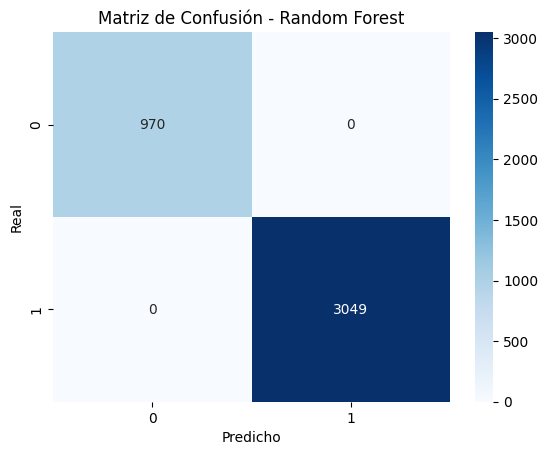

In [885]:
# Evaluación del modelo
print("\nExactitud:", accuracy_score(y_test_class, y_pred_class))
print("\nInforme de clasificación:\n", classification_report(y_test_class, y_pred_class))

# Visualización de la matriz de confusión
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


Funciones y métodos clave:
- train_test_split: Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
- test_size=0.25: El 25% de los datos se utiliza para pruebas.
- random_state=7: Fija la semilla aleatoria para asegurar que los resultados sean reproducibles.
- RandomForestClassifier: Entrena un modelo de Random Forest.
- n_estimators=100: Especifica el número de árboles en el bosque. Un número mayor puede aumentar la precisión pero también el tiempo de cómputo.
- random_state=7: Fija la semilla aleatoria para asegurar que los resultados sean reproducibles.

<h3> 3. Utiliza otro metodo de regresión para predecir el gramage del papel filtrante.

In [886]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [887]:
# Load dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')
# Seleccionar columnas relevantes y escalar todo el DataFrame
c = ['Line', 'Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Humidity', 'Temperature', 'Grammage']
dfGrammage = df.loc[df['Grammage'] != 0]
dfClean = dfGrammage[c]
scaler = preprocessing.MinMaxScaler().fit(dfClean)
df_scaled = scaler.transform(dfClean)

# Separar las características y la etiqueta
x_reg = df_scaled[:, :-1]
y_reg = df_scaled[:, -1]

In [888]:
# Dividir los datos en entrenamiento y prueba
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.25, random_state=7)

In [889]:
# Definir el modelo con parámetros ajustados
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7)
gbr.fit(x_train_reg, y_train_reg)

GradientBoostingRegressor(random_state=7)

In [890]:
# Realizar predicciones
y_pred_reg = gbr.predict(x_test_reg)
y_pred_reg

array([0.35204486, 0.35864497, 0.32174964, ..., 0.36047078, 0.31815575,
       0.35997658])

In [891]:
# Evaluar el modelo
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 0.001712051524380979
Error Absoluto Medio (MAE): 0.030376774372347603
Coeficiente de Determinación (R^2): 0.7046854955001282


In [892]:
# Mostrar predicciones específicas
predictions = pd.DataFrame({'Real': y_test_reg, 'Predicción': y_pred_reg})
print("\nPredicciones de gramaje del papel filtrante:")
predictions



Predicciones de gramaje del papel filtrante:


,Real,Predicción
0,0.410362,0.352045
1,0.305008,0.358645
2,0.317395,0.321750
3,0.361082,0.360586
4,0.423948,0.352236
...,...,...
3172,0.672749,0.528445
3173,0.344300,0.327374
3174,0.367741,0.360471
3175,0.276372,0.318156


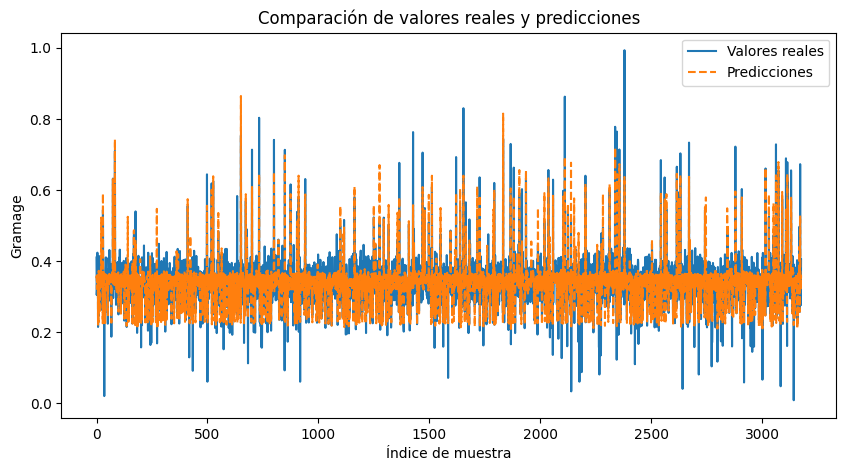

In [893]:
# Comparar predicciones con valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test_reg, label='Valores reales')
plt.plot(y_pred_reg, label='Predicciones', linestyle='--')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Gramage')
plt.title('Comparación de valores reales y predicciones')
plt.show()

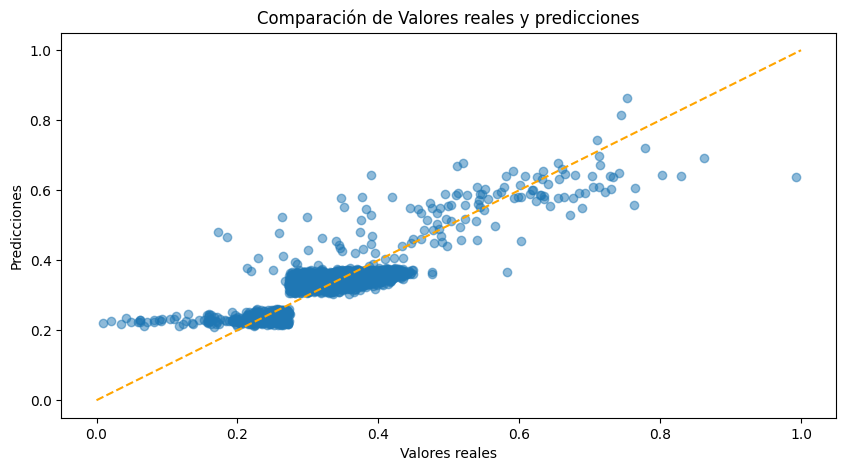

In [894]:
# Comparar predicciones con valores reales usando un gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', color='orange')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores reales y predicciones')
plt.show()


<h3> 4. Añade y explica 2 metricas para evaluar el resultado de los modelos generados (2 para el clasificador y 2 para el regresor).

In [895]:
from sklearn.metrics import roc_auc_score, log_loss, mean_absolute_percentage_error, median_absolute_error

# Simulamos probabilidades predichas para el clasificador
y_prob_clf = [0.9 if y_class == 1 else 0.1 for y_class in y_pred_class]  # Suponiendo que los positivos son 1 y los negativos son 0

# Métricas para el clasificador
roc_auc = roc_auc_score(y_test_class, y_prob_clf)
log_loss_value = log_loss(y_test_class, y_prob_clf)

print(f'ROC AUC Score: {roc_auc}')
print(f'Log Loss: {log_loss_value}')


ROC AUC Score: 0.5
Log Loss: 1.7722770959758491


In [897]:
# Métricas para el regresor
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)

print(f'MAPE: {mape}')
print(f'Median Absolute Error: {medae}')

MAPE: 0.11343212054143095
Median Absolute Error: 0.025043062358786894
